In [1]:
import xarray as xr
import pandas as pd
import rioxarray
from ndpyramid import pyramid_reproject, reproject_single_level


In [2]:
VERSION = 2
LEVELS = 6
PIXELS_PER_TILE = 128



In [3]:
import xarray as xr

store = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-cmems-duacs'
ds = xr.open_dataset(store, engine='zarr', chunks={})
ds = ds.isel(time=slice(0,2))
# ds['air'] = ds.air.rio.write_crs("epsg:4326", inplace=True)
# # create the pyramid


In [4]:
dt = pyramid_reproject(ds, levels=4)


In [14]:
level_ds_1 = reproject_single_level(ds, level=1)


In [ ]:
level_ds_4 = reproject_single_level(ds, level=4)

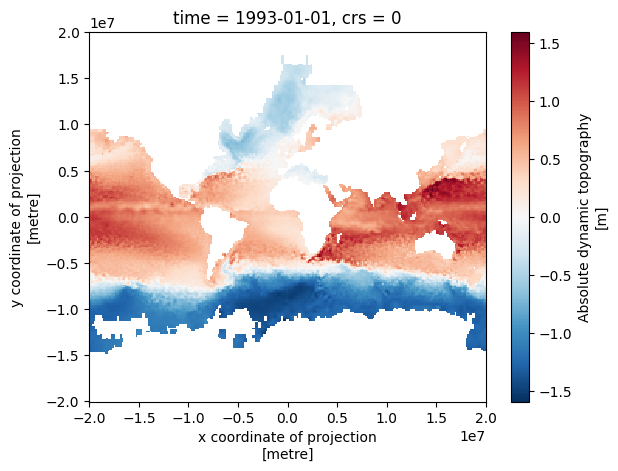

In [15]:
level_ds_1.isel(time=0).adt.plot()


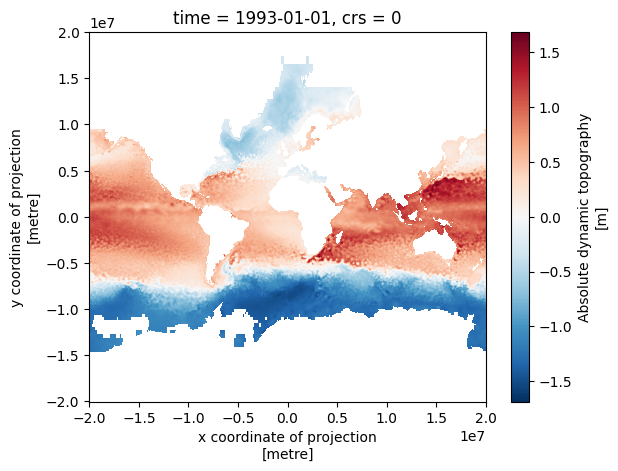

In [13]:
level_ds_4.isel(time=0).adt.plot()


In [18]:
level_ds_1

<xarray.Dataset>
Dimensions:  (x: 256, y: 256, time: 2)
Coordinates:
  * x        (x) float32 -1.996e+07 -1.98e+07 -1.965e+07 ... 1.98e+07 1.996e+07
  * y        (y) float32 1.996e+07 1.98e+07 1.965e+07 ... -1.98e+07 -1.996e+07
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02
    crs      int64 0
Data variables:
    adt      (time, y, x) float32 dask.array<chunksize=(2, 128, 128), meta=np.ndarray>
    err      (time, y, x) float32 dask.array<chunksize=(2, 128, 128), meta=np.ndarray>
    sla      (time, y, x) float32 dask.array<chunksize=(2, 128, 128), meta=np.ndarray>
    ugos     (time, y, x) float32 dask.array<chunksize=(2, 128, 128), meta=np.ndarray>
    ugosa    (time, y, x) float32 dask.array<chunksize=(2, 128, 128), meta=np.ndarray>
    vgos     (time, y, x) float32 dask.array<chunksize=(2, 128, 128), meta=np.ndarray>
    vgosa    (time, y, x) float32 dask.array<chunksize=(2, 128, 128), meta=np.ndarray>
Attributes:
    multiscales:  [{'datasets': [{'path': '1', 'crs': 'EPSG:3857'}], 'type': ...
    title:        multiscale data pyramid
    version:      0.1.0.post7+g55fe090.d20231212

In [ ]:
dt['1']

In [ ]:
dt['1'].ds.sla.isel(time=0).plot()

In [ ]:
dt['2'].ds.sla.isel(time=0).plot()

In [ ]:
dt['3'].ds.sla.isel(time=0).plot()

In [ ]:
dt